In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
musk_df= pd.read_csv('musk_csv.csv')

In [4]:
musk_df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
musk_df.shape

(6598, 170)

In [6]:
musk_df.nunique().sum

<bound method Series.sum of ID                   6598
molecule_name         102
conformation_name    6598
f1                    202
f2                    260
f3                    221
f4                    257
f5                    129
f6                    358
f7                    323
f8                    389
f9                    347
f10                   399
f11                   387
f12                   384
f13                   397
f14                   329
f15                   319
f16                   327
f17                   350
f18                   375
f19                   398
f20                   388
f21                   419
f22                   304
f23                   397
f24                   368
f25                   304
f26                   379
f27                   338
                     ... 
f138                  301
f139                  396
f140                  414
f141                  386
f142                  303
f143                  331
f144      

In [7]:
#finding null 
print(sum(musk_df.isna().sum()))

0


In [8]:
musk_df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [9]:
# label encoding the "molecule_name"
from sklearn.preprocessing import LabelEncoder
prepo= LabelEncoder()
musk_df['Molecule_name']= prepo.fit_transform(musk_df['molecule_name'])

In [10]:
musk_df.drop(['conformation_name', 'molecule_name'], axis=1, inplace= True)
#droping conformation_name because it contains unique

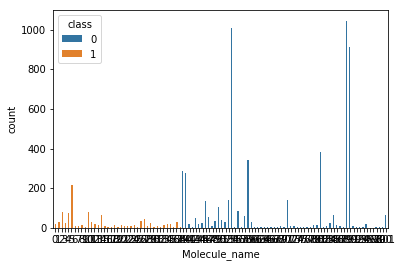

In [11]:
sns.countplot(musk_df['Molecule_name'], hue= musk_df['class'])

In [12]:
x= musk_df.drop(['class'], axis=1)
y= musk_df['class']

In [13]:
# spliting data into train and test (80:20)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 1)

In [14]:
#bulid the model
model= Sequential([
    Dense(20, activation='relu', input_shape=(168,)),
    Dense(10, activation='relu'),
    Dense(2, activation='softmax')
])

In [15]:
#compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [16]:
#train
history= model.fit(
    x_train,
    to_categorical(y_train),
    epochs=10,
    batch_size=20,
    validation_data=(x_test, to_categorical(y_test))
)

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 1s 249us/step - loss: 4.6293 - accuracy: 0.9464 - val_loss: 0.1401 - val_accuracy: 0.9902
Epoch 2/10
5278/5278 [==============================] - 1s 225us/step - loss: 0.1034 - accuracy: 0.9966 - val_loss: 0.0623 - val_accuracy: 0.9977
Epoch 3/10
5278/5278 [==============================] - 1s 269us/step - loss: 0.0305 - accuracy: 0.9979 - val_loss: 0.0021 - val_accuracy: 0.9992
Epoch 4/10
5278/5278 [==============================] - 1s 189us/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 9.0310e-11 - val_accuracy: 1.0000
Epoch 5/10
5278/5278 [==============================] - 1s 185us/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
5278/5278 [==============================] - 1s 169us/step - loss: 1.1903e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
5278/5278 [==============================] - 1s 1

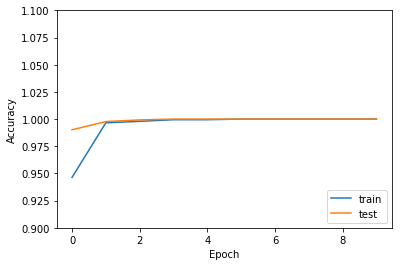

In [22]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.1])
plt.legend(loc='lower right')


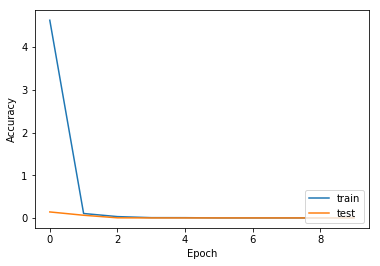

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.0, 1])
plt.legend(loc='lower right')


In [19]:
model.evaluate(
    x_test,
    to_categorical(y_test)
)

1320/1320 [==============================] - 0s 33us/step


[0.0, 1.0]

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
y_pred= model.predict(x_test)
    
print(classification_report(y_test, np.argmax(y_pred, axis=1)))
print(confusion_matrix(y_test, np.argmax(y_pred, axis=1)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1141
           1       1.00      1.00      1.00       179

   micro avg       1.00      1.00      1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320

[[1141    0]
 [   0  179]]
